In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testing-and-using-a-machine-learning-model/Test_and_Use_a_Machine_Learning_Model.ipynb


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


 # Load and Explore the Dataset

In [3]:
data = fetch_california_housing()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Add target variable to the dataset

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#  Data Preprocessing

In [4]:
# Check for missing values
print(df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['MedHouseVal']))  # Scaling only the features


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


* First, we check for any missing values in the dataset. In case there are missing values, you can handle them
*  We then perform feature scaling using StandardScaler to standardize the features to a mean of 0 and a standard deviation of 1
   This is often necessary for machine learning models to improve convergence.

# Split the Data into Training and Testing Sets

In [5]:
X = scaled_features  # Features
y = df['MedHouseVal']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 16512
Testing set size: 4128


# Train a Model (Linear Regression)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

* We create a LinearRegression model and train it using the training data (X_train, y_train)
* This step involves finding the best-fit line (or hyperplane, in higher dimensions) that minimizes the residual errors.

# Evaluate the Model

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.5332001304956565
Mean Squared Error (MSE): 0.5558915986952441
Root Mean Squared Error (RMSE): 0.7455813830127762
R² Score: 0.575787706032451


# Visualize the Results

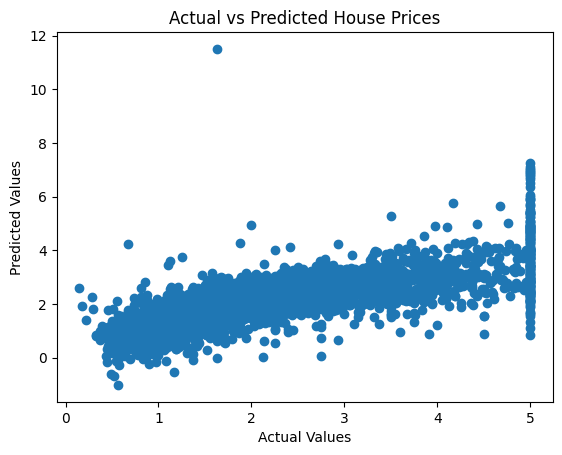

In [8]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.show()


# Make Real-Time Predictions

In [9]:
# Make a prediction for a new data point (e.g., a new house with specific features)
new_house = np.array([[8.3, 6, 0.9, 1, 2.7, 35, 7.8, 2.1]])  # Example values for features
scaled_new_house = scaler.transform(new_house)  # Scale the new data point
predicted_value = model.predict(scaled_new_house)
print(f"Predicted House Value: {predicted_value[0]}")


Predicted House Value: -36.87737147132228


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


* This step shows how to use the trained model to make predictions for a new input
  We provide example values for a new house's features, scale them, and use the trained model to predict its value.